## 11.3 - Trigonometric 2D function


In [1]:
#libraries
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


def sinsq(x,y): #target function
    return np.sin(x*x+y*y)

x = np.linspace(-1.5,1.5,50)
y = x
X,Y = np.meshgrid(x,y)
Z = sinsq(X,Y)

2024-12-30 17:57:55.050777: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-30 17:57:55.071113: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 17:57:55.234069: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 17:57:55.423631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735577875.605302   72498 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735577875.66

In [2]:
# generate a Dataset
#we need a vector of 2D points: represented as a ntrainX2 matrix ((x,y) for each element)

n_train = 10000
n_valid = int(n_train/10)
sigma = 0.2

#training data
x0_train = np.random.uniform(-1.5,1.5,n_train)
x1_train = np.random.uniform(-1.5,1.5,n_train)

x_train = np.column_stack((x0_train,x1_train))

y_train = np.random.normal(sinsq(x0_train,x1_train),sigma)

#validation data
x0_valid = np.random.uniform(-1.5,1.5,n_valid)
x1_valid = np.random.uniform(-1.5,1.5,n_valid)

x_valid = np.column_stack((x0_valid,x1_valid))

y_valid = np.random.normal(sinsq(x0_valid,x1_valid),sigma)

(1000,) (1000,) (1000,)


Text(0.5, 0, 'z')

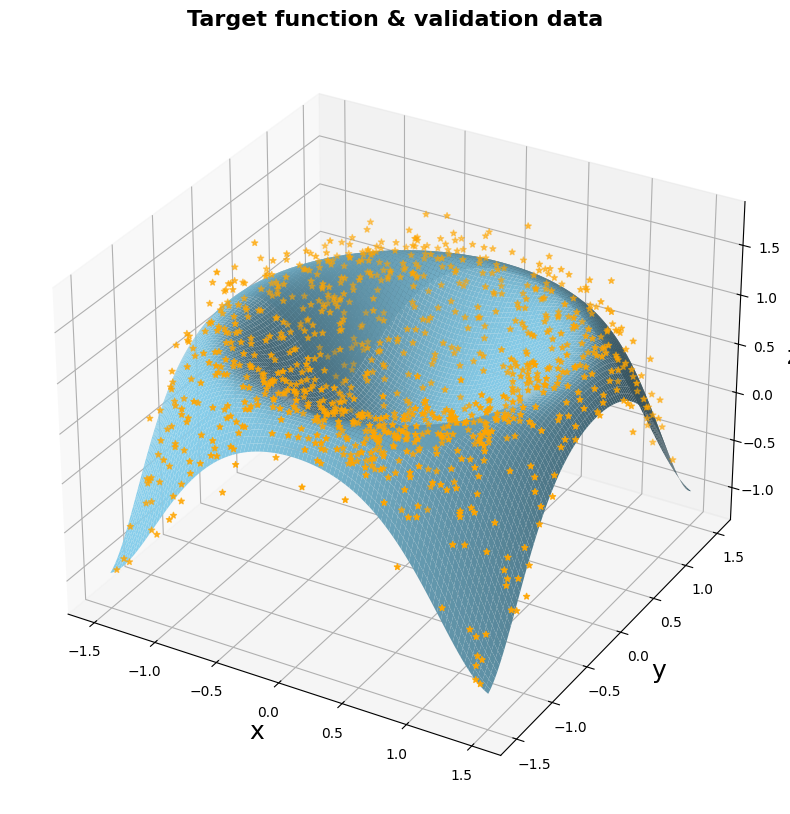

In [12]:
#graphing the target function and the validation points
xdata = x_valid.T[0]
ydata = x_valid.T[1]
zdata = y_valid

print(xdata.shape,ydata.shape,zdata.shape)

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                color='skyblue',edgecolor='none',label='Target function')
                #cmap='coolwarm', edgecolor='none')
ax.scatter3D(xdata, ydata, np.resize(zdata,(n_valid,)), color='orange',marker='*',label='validation data')
ax.set_title('Target function & validation data',fontweight='bold',fontsize=16)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
#ax.legend()

In [4]:
#building the model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(35, input_shape=(2,), activation='relu')) #input_shape now takes 2 input parameters (x, y)
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

/home/fefe/NSL/Exercise11/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-30 17:58:10.083662: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 35)             │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,546 (6.04 KB)

 Trainable params: 1,546 (6.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=100, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.1980 - val_mse: 0.1980
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1932 - mse: 0.1932 - val_loss: 0.1888 - val_mse: 0.1888
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1867 - mse: 0.1867 - val_loss: 0.1848 - val_mse: 0.1848
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1808 - mse: 0.1808 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1756 - mse: 0.1756 - val_loss: 0.1777 - val_mse: 0.1777
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.1746 - val_mse: 0.1746
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1653 - mse: 0.1653 - val_loss: 0.1716 - val_mse: 0.1716
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1676 - mse: 0.1676 - val_loss: 0.1683 - val_mse: 0.1683
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [6]:
#evaluation
# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
y_target=sinsq(x0_valid,x1_valid)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578 - mse: 0.0578 

---Evaluation with validation data---
 Test loss: 0.0584636814892292
Test accuracy: 0.0584636814892292
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mse: 0.0152 

---Evaluation with the exact curve---
 Test loss: 0.013698680326342583
Test accuracy: 0.013698680326342583


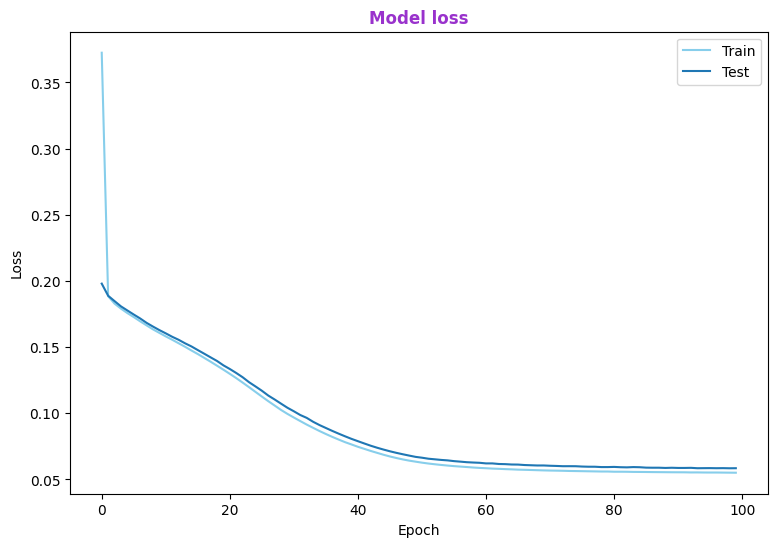

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


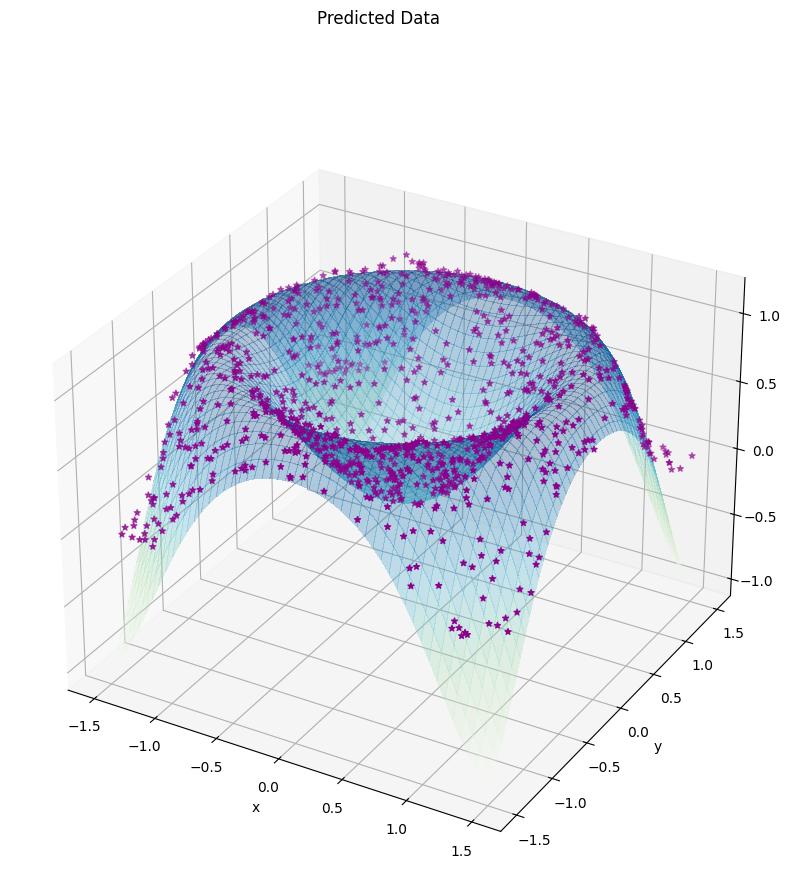

In [10]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'], c='skyblue')
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontweight='bold', c='darkorchid')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make and plot prediction
xy_predicted = np.zeros((n_valid, 2))
xy_predicted[:, 0] = np.random.uniform(-1.5, 1.5, n_valid)
xy_predicted[:, 1] = np.random.uniform(-1.5, 1.5, n_valid)

# Predict the output
z_predicted = np.zeros(n_valid)
z_predicted = model.predict(xy_predicted)
z_predicted = z_predicted.flatten()

# Create a mesh grid for plotting the true function surface
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
X.sort()
Y.sort()
X, Y = np.meshgrid(X, Y)
Z = sinsq(X, Y)

# Plot the data
fig = plt.figure(figsize=(13, 10))
plt.suptitle("Predicted Data")
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='GnBu', linewidth=0, antialiased=False, alpha=0.3)
ax.scatter(xy_predicted[:, 0], xy_predicted[:, 1], z_predicted, c='darkmagenta', marker='*', s=20, label='Predicted Points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#plt.plot(z_predicted)
plt.show()